In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.optimizers import Adam
import numpy as np

filename = "Data/dataset.npz"

# Load numpy array
dataset = np.load(filename)

x_dataset_full = dataset['x']
y_dataset_full = dataset['y']

x_test = x_dataset_full[4000:5000]
y_test = y_dataset_full[4000:5000]

x_dataset = x_dataset_full[:4000]
y_dataset = y_dataset_full[:4000]

x_val = x_dataset[3200:]
y_val = y_dataset[3200:]

x_train = x_dataset[:3200]
y_train = y_dataset[:3200]

# Assign and reshape data
x_train, y_train = x_train.reshape(3200, 1280, 64), y_train.reshape(3200, 1280, 64)
x_val, y_val = x_val.reshape(800, 1280, 64), y_val.reshape(800, 1280, 64)
x_test, y_test = x_test.reshape(1000, 1280, 64), y_test.reshape(1000, 1280, 64)

print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Training shape:  (3200, 1280, 64) (3200, 1280, 64)
Validation shape:  (800, 1280, 64) (800, 1280, 64)
Test shape:  (1000, 1280, 64) (1000, 1280, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(1280, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['acc'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=1000,
                    batch_size=80,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1280, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 3200 samples, validate on 800 samples
Epoch 1/1000
3200/3200 [==============================] - 83s 26ms/step - loss: 0.0718 - acc: 0.0030 - val_loss: 0.1125 - val_acc: 4.9023e-04
Epoch 2/1000
3200/3200 [==============================] - 80s 25ms/step - loss: 0.0627 - acc: 4.1895e-04 - val_loss: 0.1036 - val_acc: 5.6445e-04
Epoch 3/1000
3200/3200 [==============================] - 80s 25ms/step - loss: 0.0571 - acc: 0.0012 - val_loss: 0.0976 - val_acc: 5.9766e-04
Epoch 4/1000
3200/3200 [==============================] - 81s 25ms/step - loss: 0.0531 - acc: 0.0019 - val_loss: 0.0930 - val_acc: 7.4902e-04
Epoch 5/1000
3200/3200 [=======================

3200/3200 [==============================] - 76s 24ms/step - loss: 0.0219 - acc: 0.0497 - val_loss: 0.0555 - val_acc: 0.0098
Epoch 57/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0217 - acc: 0.0078 - val_loss: 0.0553 - val_acc: 0.0095
Epoch 58/1000
3200/3200 [==============================] - 75s 23ms/step - loss: 0.0216 - acc: 0.0079 - val_loss: 0.0552 - val_acc: 0.0101
Epoch 59/1000
3200/3200 [==============================] - 80s 25ms/step - loss: 0.0215 - acc: 0.0291 - val_loss: 0.0550 - val_acc: 0.0102
Epoch 60/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0213 - acc: 0.0080 - val_loss: 0.0549 - val_acc: 0.0100
Epoch 61/1000
3200/3200 [==============================] - 75s 24ms/step - loss: 0.0212 - acc: 0.0079 - val_loss: 0.0547 - val_acc: 0.0100
Epoch 62/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0211 - acc: 0.0079 - val_loss: 0.0546 - val_acc: 0.0099
Epoch 63/1000
3200/3200 [================

Epoch 115/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0176 - acc: 0.0189 - val_loss: 0.0505 - val_acc: 0.0240
Epoch 116/1000
3200/3200 [==============================] - 80s 25ms/step - loss: 0.0176 - acc: 0.0188 - val_loss: 0.0504 - val_acc: 0.0243
Epoch 117/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0176 - acc: 0.0192 - val_loss: 0.0504 - val_acc: 0.0250
Epoch 118/1000
3200/3200 [==============================] - 80s 25ms/step - loss: 0.0176 - acc: 0.0193 - val_loss: 0.0504 - val_acc: 0.0271
Epoch 119/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0175 - acc: 0.0200 - val_loss: 0.0503 - val_acc: 0.0261
Epoch 120/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0175 - acc: 0.0207 - val_loss: 0.0503 - val_acc: 0.0257
Epoch 121/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0175 - acc: 0.0206 - val_loss: 0.0503 - val_acc: 0.0271
Epoch 122/1000
3200/

3200/3200 [==============================] - 78s 24ms/step - loss: 0.0169 - acc: 0.0544 - val_loss: 0.0496 - val_acc: 0.0620
Epoch 174/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0169 - acc: 0.0543 - val_loss: 0.0496 - val_acc: 0.0635
Epoch 175/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0169 - acc: 0.0561 - val_loss: 0.0496 - val_acc: 0.0744
Epoch 176/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0169 - acc: 0.0584 - val_loss: 0.0496 - val_acc: 0.0671
Epoch 177/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0169 - acc: 0.0571 - val_loss: 0.0496 - val_acc: 0.0648
Epoch 178/1000
3200/3200 [==============================] - 81s 25ms/step - loss: 0.0169 - acc: 0.0804 - val_loss: 0.0495 - val_acc: 0.0642
Epoch 179/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0169 - acc: 0.0573 - val_loss: 0.0495 - val_acc: 0.0862
Epoch 180/1000
3200/3200 [=========

3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1008 - val_loss: 0.0494 - val_acc: 0.1524
Epoch 232/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1634 - val_loss: 0.0494 - val_acc: 0.1410
Epoch 233/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1028 - val_loss: 0.0494 - val_acc: 0.1167
Epoch 234/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1047 - val_loss: 0.0494 - val_acc: 0.1365
Epoch 235/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1152 - val_loss: 0.0494 - val_acc: 0.1246
Epoch 236/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1112 - val_loss: 0.0494 - val_acc: 0.1178
Epoch 237/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1054 - val_loss: 0.0494 - val_acc: 0.1199
Epoch 238/1000
3200/3200 [=========

3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1300 - val_loss: 0.0494 - val_acc: 0.1647
Epoch 290/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1385 - val_loss: 0.0494 - val_acc: 0.1532
Epoch 291/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1393 - val_loss: 0.0494 - val_acc: 0.1607
Epoch 292/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1460 - val_loss: 0.0494 - val_acc: 0.1495
Epoch 293/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1394 - val_loss: 0.0494 - val_acc: 0.1550
Epoch 294/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1305 - val_loss: 0.0494 - val_acc: 0.1528
Epoch 295/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1387 - val_loss: 0.0494 - val_acc: 0.1544
Epoch 296/1000
3200/3200 [=========

3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1494 - val_loss: 0.0494 - val_acc: 0.1847
Epoch 348/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1495 - val_loss: 0.0494 - val_acc: 0.1725
Epoch 349/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1516 - val_loss: 0.0494 - val_acc: 0.1754
Epoch 350/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1599 - val_loss: 0.0494 - val_acc: 0.1711
Epoch 351/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1578 - val_loss: 0.0494 - val_acc: 0.1715
Epoch 352/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1489 - val_loss: 0.0494 - val_acc: 0.1874
Epoch 353/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1708 - val_loss: 0.0494 - val_acc: 0.1741
Epoch 354/1000
3200/3200 [=========

3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1615 - val_loss: 0.0494 - val_acc: 0.1979
Epoch 406/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1570 - val_loss: 0.0494 - val_acc: 0.1896
Epoch 407/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1573 - val_loss: 0.0494 - val_acc: 0.2037
Epoch 408/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1797 - val_loss: 0.0494 - val_acc: 0.1896
Epoch 409/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1647 - val_loss: 0.0494 - val_acc: 0.1810
Epoch 410/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1595 - val_loss: 0.0494 - val_acc: 0.2104
Epoch 411/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1605 - val_loss: 0.0494 - val_acc: 0.1829
Epoch 412/1000
3200/3200 [=========

3200/3200 [==============================] - 80s 25ms/step - loss: 0.0168 - acc: 0.1797 - val_loss: 0.0494 - val_acc: 0.2044
Epoch 464/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1771 - val_loss: 0.0494 - val_acc: 0.2047
Epoch 465/1000
3200/3200 [==============================] - 80s 25ms/step - loss: 0.0168 - acc: 0.1751 - val_loss: 0.0494 - val_acc: 0.1982
Epoch 466/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1661 - val_loss: 0.0494 - val_acc: 0.1935
Epoch 467/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1818 - val_loss: 0.0494 - val_acc: 0.2051
Epoch 468/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1788 - val_loss: 0.0494 - val_acc: 0.1985
Epoch 469/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1780 - val_loss: 0.0494 - val_acc: 0.2036
Epoch 470/1000
3200/3200 [=========

3200/3200 [==============================] - 75s 24ms/step - loss: 0.0168 - acc: 0.2092 - val_loss: 0.0494 - val_acc: 0.2077
Epoch 522/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1746 - val_loss: 0.0494 - val_acc: 0.2052
Epoch 523/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1693 - val_loss: 0.0494 - val_acc: 0.1956
Epoch 524/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1715 - val_loss: 0.0494 - val_acc: 0.2043
Epoch 525/1000
3200/3200 [==============================] - 76s 24ms/step - loss: 0.0168 - acc: 0.1699 - val_loss: 0.0494 - val_acc: 0.1967
Epoch 526/1000
3200/3200 [==============================] - 76s 24ms/step - loss: 0.0168 - acc: 0.1701 - val_loss: 0.0494 - val_acc: 0.1963
Epoch 527/1000
3200/3200 [==============================] - 75s 24ms/step - loss: 0.0168 - acc: 0.1814 - val_loss: 0.0494 - val_acc: 0.1969
Epoch 528/1000
3200/3200 [=========

3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1741 - val_loss: 0.0494 - val_acc: 0.2187
Epoch 580/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1816 - val_loss: 0.0494 - val_acc: 0.2140
Epoch 581/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1927 - val_loss: 0.0494 - val_acc: 0.2106
Epoch 582/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1750 - val_loss: 0.0494 - val_acc: 0.2033
Epoch 583/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1779 - val_loss: 0.0494 - val_acc: 0.2015
Epoch 584/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1762 - val_loss: 0.0494 - val_acc: 0.2147
Epoch 585/1000
3200/3200 [==============================] - 76s 24ms/step - loss: 0.0168 - acc: 0.1748 - val_loss: 0.0494 - val_acc: 0.2124
Epoch 586/1000
3200/3200 [=========

3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1961 - val_loss: 0.0494 - val_acc: 0.2184
Epoch 638/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1974 - val_loss: 0.0494 - val_acc: 0.2242
Epoch 639/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.2095 - val_loss: 0.0494 - val_acc: 0.2021
Epoch 640/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1802 - val_loss: 0.0494 - val_acc: 0.2155
Epoch 641/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1978 - val_loss: 0.0494 - val_acc: 0.2169
Epoch 642/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1819 - val_loss: 0.0494 - val_acc: 0.2192
Epoch 643/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1906 - val_loss: 0.0494 - val_acc: 0.2180
Epoch 644/1000
3200/3200 [=========

3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1939 - val_loss: 0.0494 - val_acc: 0.2092
Epoch 696/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1966 - val_loss: 0.0494 - val_acc: 0.2210
Epoch 697/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1846 - val_loss: 0.0494 - val_acc: 0.2137
Epoch 698/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1904 - val_loss: 0.0494 - val_acc: 0.2274
Epoch 699/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1873 - val_loss: 0.0494 - val_acc: 0.2088
Epoch 700/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1948 - val_loss: 0.0494 - val_acc: 0.2172
Epoch 701/1000
3200/3200 [==============================] - 81s 25ms/step - loss: 0.0168 - acc: 0.2084 - val_loss: 0.0494 - val_acc: 0.2166
Epoch 702/1000
3200/3200 [=========

3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1946 - val_loss: 0.0494 - val_acc: 0.2188
Epoch 754/1000
3200/3200 [==============================] - 78s 25ms/step - loss: 0.0168 - acc: 0.1908 - val_loss: 0.0494 - val_acc: 0.2309
Epoch 755/1000
3200/3200 [==============================] - 76s 24ms/step - loss: 0.0168 - acc: 0.2153 - val_loss: 0.0494 - val_acc: 0.2168
Epoch 756/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1850 - val_loss: 0.0494 - val_acc: 0.2191
Epoch 757/1000
3200/3200 [==============================] - 76s 24ms/step - loss: 0.0168 - acc: 0.1866 - val_loss: 0.0494 - val_acc: 0.2177
Epoch 758/1000
3200/3200 [==============================] - 75s 24ms/step - loss: 0.0168 - acc: 0.1922 - val_loss: 0.0494 - val_acc: 0.2200
Epoch 759/1000
3200/3200 [==============================] - 76s 24ms/step - loss: 0.0168 - acc: 0.1897 - val_loss: 0.0494 - val_acc: 0.2277
Epoch 760/1000
3200/3200 [=========

3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.2074 - val_loss: 0.0494 - val_acc: 0.2214
Epoch 812/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1903 - val_loss: 0.0494 - val_acc: 0.2157
Epoch 813/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1884 - val_loss: 0.0494 - val_acc: 0.2179
Epoch 814/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1959 - val_loss: 0.0494 - val_acc: 0.2231
Epoch 815/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1893 - val_loss: 0.0494 - val_acc: 0.2435
Epoch 816/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.2033 - val_loss: 0.0494 - val_acc: 0.2277
Epoch 817/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.2035 - val_loss: 0.0494 - val_acc: 0.2268
Epoch 818/1000
3200/3200 [=========

3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.2033 - val_loss: 0.0494 - val_acc: 0.2332
Epoch 870/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.2163 - val_loss: 0.0494 - val_acc: 0.2284
Epoch 871/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.2036 - val_loss: 0.0494 - val_acc: 0.2485
Epoch 872/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1923 - val_loss: 0.0494 - val_acc: 0.2256
Epoch 873/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1901 - val_loss: 0.0494 - val_acc: 0.5180
Epoch 874/1000
3200/3200 [==============================] - 80s 25ms/step - loss: 0.0168 - acc: 0.2025 - val_loss: 0.0494 - val_acc: 0.3764
Epoch 875/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.2271 - val_loss: 0.0494 - val_acc: 0.2437
Epoch 876/1000
3200/3200 [=========

3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.2083 - val_loss: 0.0494 - val_acc: 0.2358
Epoch 928/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1945 - val_loss: 0.0494 - val_acc: 0.2333
Epoch 929/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.2157 - val_loss: 0.0494 - val_acc: 0.2249
Epoch 930/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1944 - val_loss: 0.0494 - val_acc: 0.2378
Epoch 931/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.1938 - val_loss: 0.0494 - val_acc: 0.2339
Epoch 932/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1938 - val_loss: 0.0494 - val_acc: 0.2377
Epoch 933/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.2017 - val_loss: 0.0494 - val_acc: 0.2261
Epoch 934/1000
3200/3200 [=========

3200/3200 [==============================] - 80s 25ms/step - loss: 0.0168 - acc: 0.1957 - val_loss: 0.0494 - val_acc: 0.2325
Epoch 986/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.2083 - val_loss: 0.0494 - val_acc: 0.2304
Epoch 987/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1960 - val_loss: 0.0494 - val_acc: 0.2407
Epoch 988/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.2073 - val_loss: 0.0494 - val_acc: 0.2354
Epoch 989/1000
3200/3200 [==============================] - 79s 25ms/step - loss: 0.0168 - acc: 0.2095 - val_loss: 0.0494 - val_acc: 0.2419
Epoch 990/1000
3200/3200 [==============================] - 77s 24ms/step - loss: 0.0168 - acc: 0.1956 - val_loss: 0.0494 - val_acc: 0.2508
Epoch 991/1000
3200/3200 [==============================] - 78s 24ms/step - loss: 0.0168 - acc: 0.1943 - val_loss: 0.0494 - val_acc: 0.2400
Epoch 992/1000
3200/3200 [=========

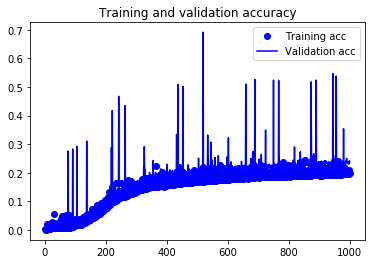

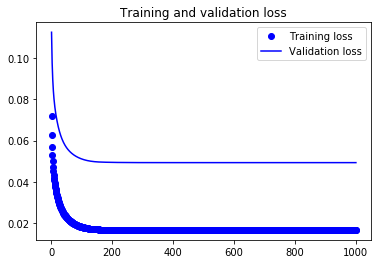

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

1000/1000 [==============================] - 14s 14ms/step
Test accuracy: 0.3335632847547531
Test loss: 0.022422869475529298
